#WHich machine learning models are sensitive to Outliers?

1. Naivye Bayes -> Not sensitive to outliers
2. SVM -> Not sensitive
3. Linear Regression -> Sensitive
4. Logistic Regression -> Sensitive
5. Decision Tree Regression or classifier -> Not sensitive
6. Ensemble(Randome Forrest,XGBoost,Gradient Boost) -> Not sensitive
7. KNN -> Not Sensitive
8. Kmeans -> Sensitive
9. Hierarchial -> Sensitive
10. PCA -> Sensitive
11. Neural networks -> Sensitive

In [39]:
import pandas as pd
df=pd.read_csv('../Datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# If Feature is following Normal Distribution

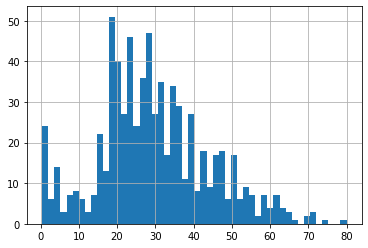

In [7]:
df.Age.hist(bins=50)

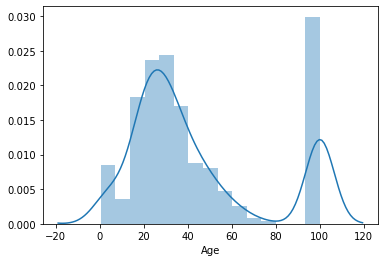

In [10]:
import seaborn as sns
sns.distplot(df.Age.fillna(100))

In [18]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
df.Age.std()

14.526497332334042

In [24]:
## Finding Outliers using 3std.
lower_bound=df.Age.mean() - 3*(df.Age.std())
upper_bound=df.Age.mean() + 3*(df.Age.std())
print(lower_bound)
print(upper_bound)

-13.880374349943303
73.27860964406094


In [27]:
## Find Outliers using IQR
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)
print(IQR)
lower_bridge=df.Age.quantile(0.25)-1.5*IQR
upper_bridge=df.Age.quantile(0.75)+1.5*IQR
print(lower_bridge)
print(upper_bridge)

17.875
-6.6875
64.8125


In [29]:
## Finding Extreme Outliers
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)
print(IQR)
lower_bridge=df.Age.quantile(0.25)-3*IQR
upper_bridge=df.Age.quantile(0.75)+3*IQR
print(lower_bridge)
print(upper_bridge)

17.875
-33.5
91.625


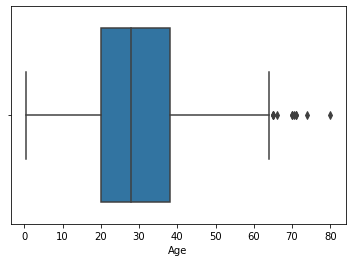

In [36]:
sns.boxplot(df.Age)

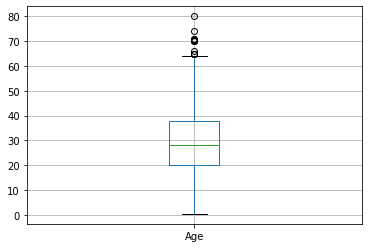

In [38]:
df.boxplot(column='Age')

# If the Feature is skewed

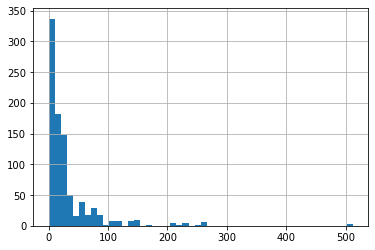

In [47]:
df.Fare.hist(bins=50)

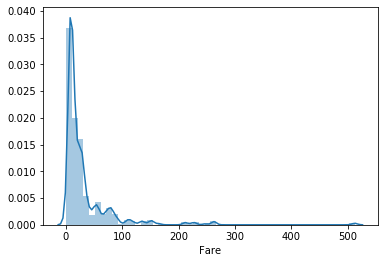

In [48]:
sns.distplot(df['Fare'])

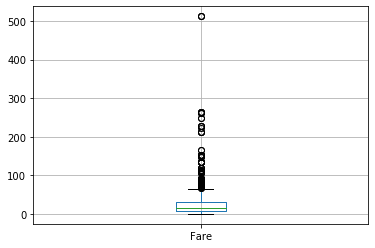

In [45]:
df.boxplot(column='Fare')

In [46]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [59]:
## When data is skewed , you should use Extreme Outliers to figureout outliers
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
#print(IQR)
lower_bridge=df.Fare.quantile(0.25)-3*IQR
upper_bridge=df.Fare.quantile(0.75)+3*IQR
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


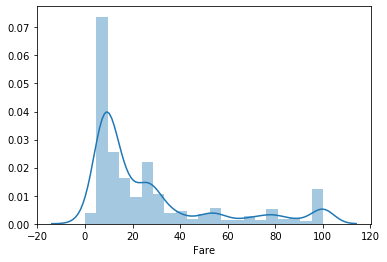

In [61]:
#Replacing outliers with upper bound or lower bound values.
data=df.copy()
data.loc[data['Age']>=73,'Age']=73
data.loc[data['Fare']>=100,'Fare']=100
sns.distplot(data['Fare'])

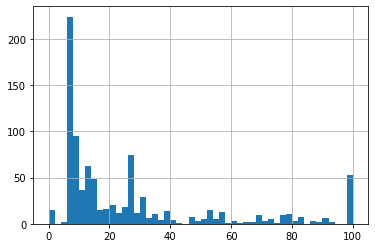

In [63]:
data.Fare.hist(bins=50)

In [65]:
#Apply ML Algorithms
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [68]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

from sklearn.metrics import accuracy_score,roc_auc_score
y_pred1=lr.predict_proba(x_test)
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('roc auc score:',roc_auc_score(y_test,y_pred1[:,1]))

Accuracy score: 0.6865671641791045
roc auc score: 0.7431712962962962


In [71]:
#Randormforrest Classifer
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)
y_pred1=rf.predict_proba(x_test)
print('Accuracy score:',accuracy_score(y_test,y_predict))
print('roc auc score:',roc_auc_score(y_test,y_pred1[:,1]))

Accuracy score: 0.6753731343283582
roc auc score: 0.7325810185185185
